Setting up PyTorch plugin "bias_act_plugin"... 

c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\torch\utils\cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\setuptools\_distutils\_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

d:\code\AIGC\stylegan2-ada-pytorch\torch_utils\ops\bias_act.py:50: UserWarning: Failed to build CUDA kernels for bias_act. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\torch\utils\cpp_extension.py", line 2506, in _run_ninja_build
    subprocess.run(
  File "c:\Users\Windows11\anaconda3\envs\stylegan\lib\subprocess.py", line 526, in run
    raise CalledProcessError(retcode, process.args,
subprocess.CalledProcessError: Command '['ninja', '-v']' returned non-zero exit status 1104.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "d:\code\AIGC\stylegan2-ada-pytorch\torch_utils\ops\bias_act.py", line 48, in _init
    _plugin = custom_ops.get_plugin('bias_act_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "d:\code\AIGC\stylegan2-ada-pytorch\torch_utils\custom_ops.py", line 110, in get_plugi

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


d:\code\AIGC\stylegan2-ada-pytorch\torch_utils\ops\upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\torch\utils\cpp_extension.py", line 2506, in _run_ninja_build
    subprocess.run(
  File "c:\Users\Windows11\anaconda3\envs\stylegan\lib\subprocess.py", line 526, in run
    raise CalledProcessError(retcode, process.args,
subprocess.CalledProcessError: Command '['ninja', '-v']' returned non-zero exit status 1104.

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "d:\code\AIGC\stylegan2-ada-pytorch\torch_utils\ops\upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "d:\code\AIGC\stylegan2-ada-pytorch\torch_utils\custom_ops.py", line 110, in get_p

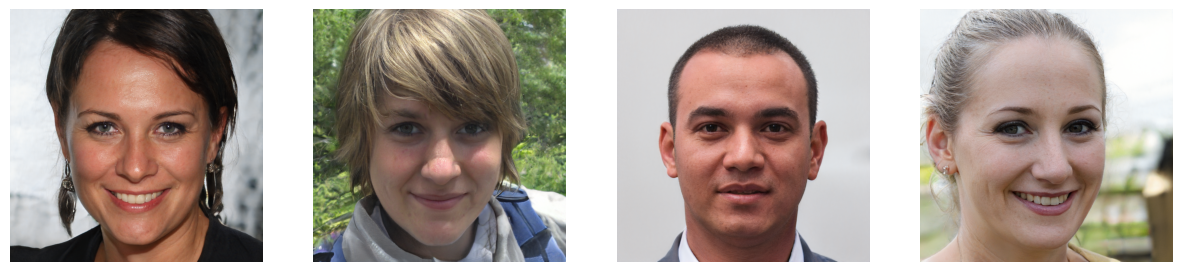

In [1]:
import torch
import sys
import os
import matplotlib.pyplot as plt
import warnings

# 添加克隆的仓库路径到Python路径
sys.path.append('stylegan2-ada-pytorch')  # 修改为你的实际路径

# 禁用StyleGAN的自定义操作编译
#os.environ['PYTORCH_JIT'] = '0'

# 过滤警告
#warnings.filterwarnings('ignore', category=UserWarning)

# 现在可以直接导入
import dnnlib
import legacy

def generate_images(num_images=4):
    # 下载预训练权重（如果本地没有会自动下载）
    model_url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl'
    
    # 加载模型
    with dnnlib.util.open_url(model_url) as f:
        model = legacy.load_network_pkl(f)['G_ema'].cuda()  # 使用指数移动平均的生成器
    
    model.eval()
    
    # 生成随机噪声向量
    z = torch.randn(num_images, model.z_dim).cuda()
    
    # 生成图像
    with torch.no_grad():
        # 注意：StyleGAN2的输出范围是[-1, 1]，需要转换到[0, 1]
        images = model(z, None, truncation_psi=0.7)
        images = (images + 1) / 2  # 从[-1,1]转换到[0,1]
    
    # 显示图像
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        # 调整维度顺序：C,H,W -> H,W,C
        img = images[i].permute(1, 2, 0).cpu().numpy()
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

# 生成4张图像
generate_images(4)

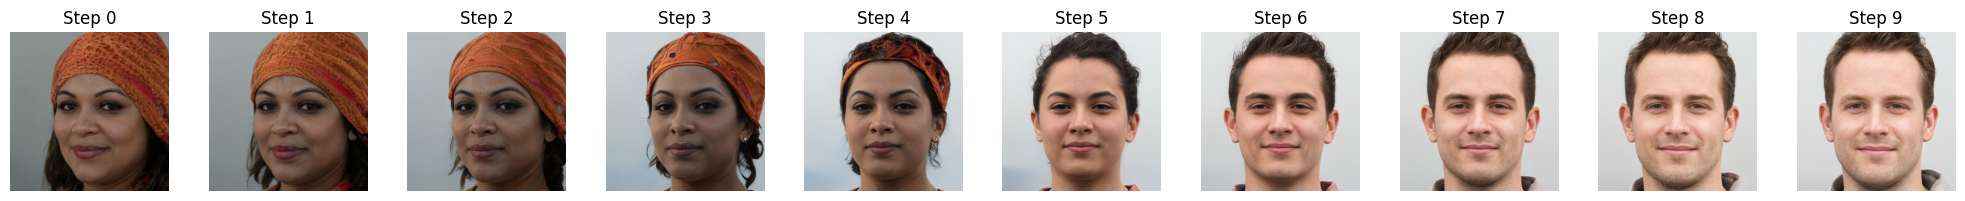

In [2]:
def latent_space_interpolation():
    """展示潜在空间插值效果"""
    # 下载预训练权重（如果本地没有会自动下载）
    model_url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl'

    # 加载模型
    with dnnlib.util.open_url(model_url) as f:
        model = legacy.load_network_pkl(f)['G_ema'].cuda()  # 使用指数移动平均的生成器

    model.eval()

    # 生成两个随机向量
    z1 = torch.randn(1, model.z_dim).cuda()
    z2 = torch.randn(1, model.z_dim).cuda()
    
    # 插值
    num_steps = 10
    images = []
    
    for alpha in torch.linspace(0, 1, num_steps):
        # 线性插值
        z = alpha * z1 + (1 - alpha) * z2
        
        with torch.no_grad():
            img = model(z, None, truncation_psi=0.7)
            img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8).cpu().numpy()
            images.append(img[0])
    
    # 显示插值结果
    fig, axes = plt.subplots(1, num_steps, figsize=(20, 2))
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Step {i}')
    plt.tight_layout()
    plt.show()

# 运行插值示例
latent_space_interpolation()


StyleGAN2-ADA 自动设置和图像生成
正在设置 StyleGAN 环境...
正在克隆 StyleGAN2-ADA-PyTorch 仓库...
✓ 仓库克隆成功
正在下载预训练权重 (FFHQ, 335MB)...
下载进度: 100%
✓ 预训练权重下载成功
正在加载模型...
✓ 模型已加载到 GPU

开始生成图像
正在生成 4 张图像...
Setting up PyTorch plugin "bias_act_plugin"... 

c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\torch\utils\cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\setuptools\_distutils\_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... 

c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\torch\utils\cpp_extension.py:2356: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
c:\Users\Windows11\anaconda3\envs\stylegan\lib\site-packages\setuptools\_distutils\_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


Done.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.040535808..1.292212].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.08863604..1.0860733].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.013236046..1.0724535].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.024057746..1.1112835].


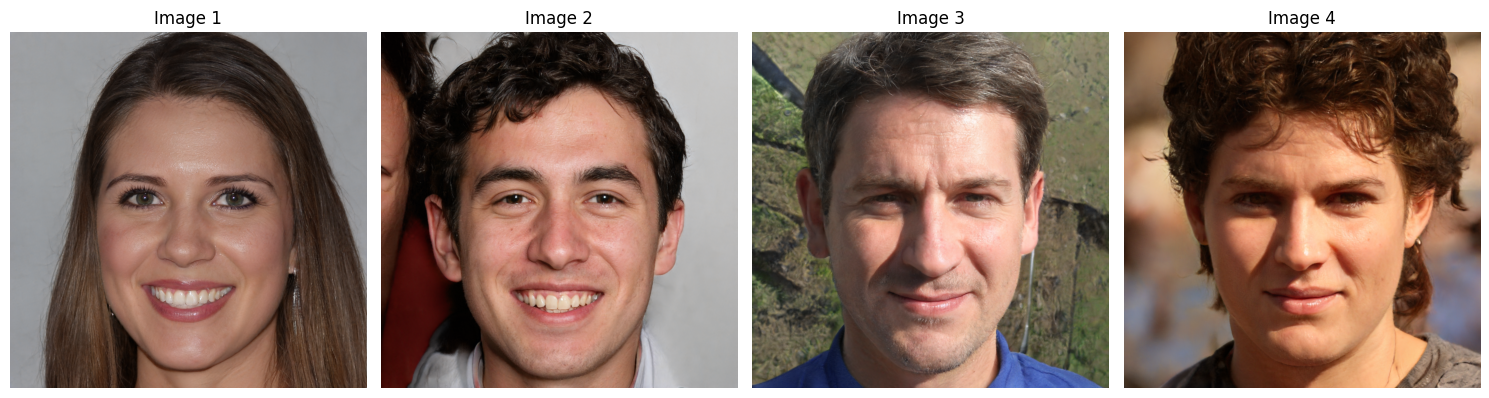


潜在空间插值演示
正在进行潜在空间插值...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06429076..1.0788219].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13556302..1.0871674].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.083655834..1.0863538].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05244088..1.1110797].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.037530422..1.101068].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07186079..1.1882583].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0

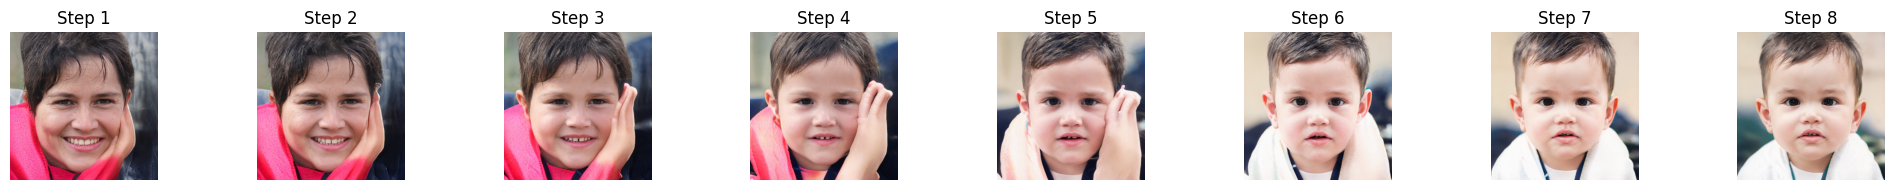


项目结构
当前目录: d:\code\AIGC
仓库位置: d:\code\AIGC\stylegan2-ada-pytorch
模型文件: d:\code\AIGC\ffhq.pkl
模型大小: 363.9 MB


In [1]:
import os
import sys
import subprocess
import urllib.request
import pickle
import torch
import matplotlib.pyplot as plt
from pathlib import Path

def setup_stylegan():
    """设置 StyleGAN 环境：克隆仓库并下载预训练权重"""
    
    # 获取当前脚本所在目录
    current_dir = Path.cwd()
    repo_dir = current_dir / "stylegan2-ada-pytorch"
    model_path = current_dir / "ffhq.pkl"
    
    print("正在设置 StyleGAN 环境...")
    
    # 1. 克隆仓库（如果不存在）
    if not repo_dir.exists():
        print("正在克隆 StyleGAN2-ADA-PyTorch 仓库...")
        try:
            # 使用 git 命令克隆仓库
            result = subprocess.run([
                "git", "clone", "https://github.com/NVlabs/stylegan2-ada-pytorch.git",
                str(repo_dir)
            ], capture_output=True, text=True, check=True)
            print("✓ 仓库克隆成功")
        except subprocess.CalledProcessError as e:
            print(f"✗ 克隆失败: {e}")
            print("请确保已安装 git 或检查网络连接")
            return None, None
        except FileNotFoundError:
            print("✗ 未找到 git 命令，请先安装 git")
            return None, None
    else:
        print("✓ 仓库已存在，跳过克隆")
    
    # 2. 添加仓库路径到 Python 路径
    sys.path.insert(0, str(repo_dir))
    
    # 3. 下载预训练权重（如果不存在）
    if not model_path.exists():
        print("正在下载预训练权重 (FFHQ, 335MB)...")
        try:
            # 下载模型
            url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl'
            
            def progress_hook(count, block_size, total_size):
                percent = int(count * block_size * 100 / total_size)
                print(f"\r下载进度: {percent}%", end='', flush=True)
            
            urllib.request.urlretrieve(url, model_path, progress_hook)
            print("\n✓ 预训练权重下载成功")
        except Exception as e:
            print(f"\n✗ 下载失败: {e}")
            print("请检查网络连接或手动下载权重文件")
            return None, None
    else:
        print("✓ 预训练权重已存在")
    
    return repo_dir, model_path

def load_model(model_path):
    """加载预训练模型"""
    try:
        # 动态导入仓库中的模块
        import dnnlib
        import legacy
        
        print("正在加载模型...")
        with open(model_path, 'rb') as f:
            model_data = pickle.load(f)
        
        model = model_data['G_ema']  # 使用指数移动平均的生成器
        
        # 移动到GPU（如果可用）
        if torch.cuda.is_available():
            model = model.cuda()
            print("✓ 模型已加载到 GPU")
        else:
            print("✓ 模型已加载到 CPU")
        
        model.eval()
        return model
        
    except Exception as e:
        print(f"✗ 模型加载失败: {e}")
        return None

def generate_images(model, num_images=4, truncation_psi=0.7):
    """使用模型生成图像"""
    if model is None:
        print("模型未正确加载")
        return
    
    print(f"正在生成 {num_images} 张图像...")
    
    # 生成随机噪声向量
    z_dim = model.z_dim
    z = torch.randn(num_images, z_dim)
    
    # 移动到GPU（如果可用）
    if torch.cuda.is_available():
        z = z.cuda()
    
    # 生成图像
    with torch.no_grad():
        images = model(z, None, truncation_psi=truncation_psi)
        images = (images + 1) / 2  # 从[-1,1]转换到[0,1]
    
    # 显示图像
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    if num_images == 1:
        axes = [axes]
    
    for i in range(num_images):
        # 调整维度顺序：C,H,W -> H,W,C
        img = images[i].permute(1, 2, 0).cpu().numpy()
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Image {i+1}')
    
    plt.tight_layout()
    plt.show()
    
    return images

def latent_space_interpolation(model, num_steps=10):
    """潜在空间插值演示"""
    if model is None:
        print("模型未正确加载")
        return
    
    print("正在进行潜在空间插值...")
    
    # 生成两个随机向量
    z1 = torch.randn(1, model.z_dim)
    z2 = torch.randn(1, model.z_dim)
    
    if torch.cuda.is_available():
        z1, z2 = z1.cuda(), z2.cuda()
    
    # 插值生成图像
    images = []
    for alpha in torch.linspace(0, 1, num_steps):
        z = alpha * z1 + (1 - alpha) * z2
        
        with torch.no_grad():
            img = model(z, None, truncation_psi=0.7)
            img = (img + 1) / 2
            images.append(img[0].cpu())
    
    # 显示插值结果
    fig, axes = plt.subplots(1, num_steps, figsize=(20, 2))
    for i, img in enumerate(images):
        img_display = img.permute(1, 2, 0).numpy()
        axes[i].imshow(img_display)
        axes[i].axis('off')
        axes[i].set_title(f'Step {i+1}')
    
    plt.tight_layout()
    plt.show()

def main():
    """主函数"""
    print("=" * 50)
    print("StyleGAN2-ADA 自动设置和图像生成")
    print("=" * 50)
    
    # 1. 设置环境
    repo_dir, model_path = setup_stylegan()
    
    if repo_dir is None or model_path is None:
        print("环境设置失败，程序退出")
        return
    
    # 2. 加载模型
    model = load_model(model_path)
    if model is None:
        print("模型加载失败，程序退出")
        return
    
    # 3. 生成图像
    print("\n" + "=" * 30)
    print("开始生成图像")
    print("=" * 30)
    
    # 生成4张示例图像
    generate_images(model, num_images=4)
    
    # 4. 显示潜在空间插值
    print("\n" + "=" * 30)
    print("潜在空间插值演示")
    print("=" * 30)
    
    latent_space_interpolation(model, num_steps=8)
    
    # 5. 显示项目结构
    print("\n" + "=" * 30)
    print("项目结构")
    print("=" * 30)
    print(f"当前目录: {Path.cwd()}")
    print(f"仓库位置: {repo_dir}")
    print(f"模型文件: {model_path}")
    print(f"模型大小: {model_path.stat().st_size / (1024*1024):.1f} MB")

if __name__ == "__main__":
    # 检查依赖
    try:
        import torch
        import matplotlib.pyplot as plt
    except ImportError as e:
        print(f"缺少依赖库: {e}")
        print("请运行: pip install torch torchvision matplotlib")
        exit(1)
    
    main()